# Tesla (TSLA) Stock Price prediction using Prophet

## Importing all the necessary Libraries

In [ ]:
!pip install prophet

import prophet

In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default= 'colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv("TSLA.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-09,180.250000,185.179993,172.509995,172.919998,172.919998,170023800
1,2023-03-10,175.130005,178.289993,168.440002,173.440002,173.440002,191488900
2,2023-03-13,167.460007,177.350006,163.910004,174.479996,174.479996,167790300
3,2023-03-14,177.309998,183.800003,177.139999,183.259995,183.259995,143717900
4,2023-03-15,180.800003,182.339996,176.029999,180.449997,180.449997,145995600
...,...,...,...,...,...,...,...
247,2024-03-04,198.729996,199.750000,186.720001,188.139999,188.139999,134334900
248,2024-03-05,183.050003,184.589996,177.570007,180.740005,180.740005,119660800
249,2024-03-06,179.990005,181.580002,173.699997,176.539993,176.539993,107920900
250,2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,223.070635,227.287580,218.730357,223.138214,223.138214,1.225504e+08
std,34.619004,35.017634,34.144492,34.562073,34.562073,2.553054e+07
min,152.639999,160.479996,152.369995,153.750000,153.750000,6.512520e+07
25%,190.685005,194.577496,187.042496,190.799996,190.799996,1.040473e+08
50%,229.955002,235.364998,225.959999,232.120003,232.120003,1.187634e+08
75%,251.562496,257.977501,247.324993,252.699993,252.699993,1.357440e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.117971e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x="Date", y= "Close")

In [ ]:
px.line(df, x="Date", y= "Close")

In [ ]:
px.area(df, x="Date", y= "Volume")

In [ ]:
px.bar(df, y="Volume")

In [ ]:
px.box(df, y="Close")

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-09,180.250000,185.179993,172.509995,172.919998,172.919998,170023800
1,2023-03-10,175.130005,178.289993,168.440002,173.440002,173.440002,191488900
2,2023-03-13,167.460007,177.350006,163.910004,174.479996,174.479996,167790300
3,2023-03-14,177.309998,183.800003,177.139999,183.259995,183.259995,143717900
4,2023-03-15,180.800003,182.339996,176.029999,180.449997,180.449997,145995600
...,...,...,...,...,...,...,...
247,2024-03-04,198.729996,199.750000,186.720001,188.139999,188.139999,134334900
248,2024-03-05,183.050003,184.589996,177.570007,180.740005,180.740005,119660800
249,2024-03-06,179.990005,181.580002,173.699997,176.539993,176.539993,107920900
250,2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000


In [ ]:
columns = ["Date", "Close"]
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
ndf

,Date,Close
0,2023-03-09,172.919998
1,2023-03-10,173.440002
2,2023-03-13,174.479996
3,2023-03-14,183.259995
4,2023-03-15,180.449997
...,...,...
247,2024-03-04,188.139999
248,2024-03-05,180.740005
249,2024-03-06,176.539993
250,2024-03-07,178.649994


In [ ]:
prophet_df = ndf.rename(columns={"Date":"ds","Close":"y"})

In [ ]:
prophet_df

,ds,y
0,2023-03-09,172.919998
1,2023-03-10,173.440002
2,2023-03-13,174.479996
3,2023-03-14,183.259995
4,2023-03-15,180.449997
...,...,...
247,2024-03-04,188.139999
248,2024-03-05,180.740005
249,2024-03-06,176.539993
250,2024-03-07,178.649994


## Creating Prophet Model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7ubzfon/p9ichjgi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7ubzfon/ve_2yat_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17992', 'data', 'file=/tmp/tmpp7ubzfon/p9ichjgi.json', 'init=/tmp/tmpp7ubzfon/ve_2yat_.json', 'output', 'file=/tmp/tmpp7ubzfon/prophet_model01ytnvri/prophet_model-20240309221837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future= m.make_future_dataframe(periods=30)
forecast= m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-03-09,167.951815,143.847505,192.314113,167.951815,167.951815,-1.384662,-1.384662,-1.384662,-1.384662,-1.384662,-1.384662,0.0,0.0,0.0,166.567153
1,2023-03-10,168.412471,143.649105,193.311392,168.412471,168.412471,-1.481219,-1.481219,-1.481219,-1.481219,-1.481219,-1.481219,0.0,0.0,0.0,166.931252
2,2023-03-13,169.794440,142.602352,190.960025,169.794440,169.794440,-1.823487,-1.823487,-1.823487,-1.823487,-1.823487,-1.823487,0.0,0.0,0.0,167.970953
3,2023-03-14,170.255096,144.788559,194.779586,170.255096,170.255096,0.502579,0.502579,0.502579,0.502579,0.502579,0.502579,0.0,0.0,0.0,170.757675
4,2023-03-15,170.715753,146.367882,193.805188,170.715753,170.715753,-0.351716,-0.351716,-0.351716,-0.351716,-0.351716,-0.351716,0.0,0.0,0.0,170.364036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2024-04-03,174.484932,148.244252,199.572918,172.267632,176.644243,-0.351716,-0.351716,-0.351716,-0.351716,-0.351716,-0.351716,0.0,0.0,0.0,174.133215
278,2024-04-04,173.948877,149.165944,196.781592,171.598068,176.209346,-1.384662,-1.384662,-1.384662,-1.384662,-1.384662,-1.384662,0.0,0.0,0.0,172.564215
279,2024-04-05,173.412822,148.921903,196.520835,170.902152,175.807037,-1.481219,-1.481219,-1.481219,-1.481219,-1.481219,-1.481219,0.0,0.0,0.0,171.931603
280,2024-04-06,172.876767,151.552410,198.638893,170.261427,175.363485,2.269253,2.269253,2.269253,2.269253,2.269253,2.269253,0.0,0.0,0.0,175.146019


In [ ]:
px.line(forecast, x='ds', y='yhat')

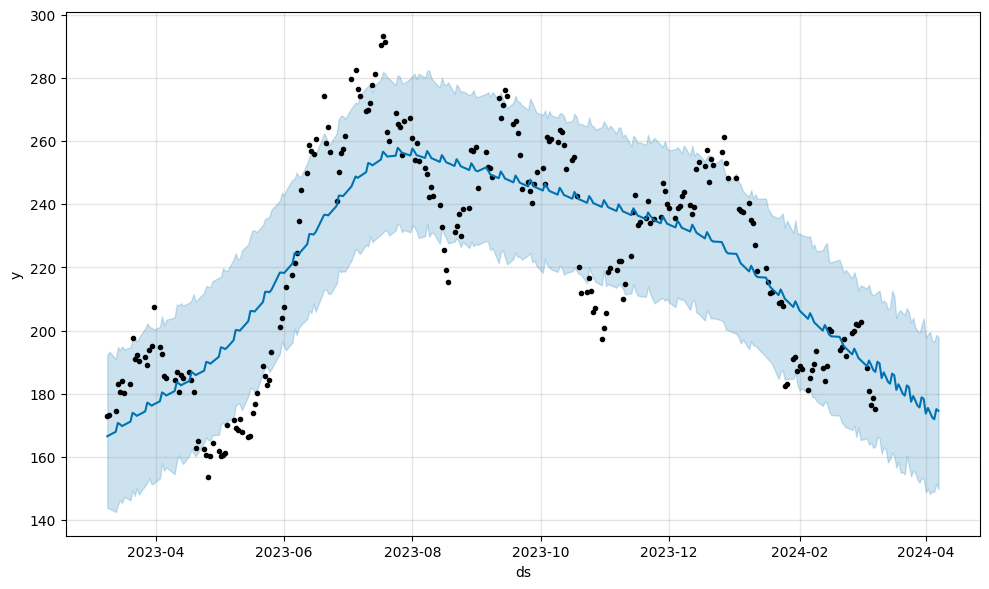

In [ ]:
figure= m.plot(forecast, xlabel='ds', ylabel='y')

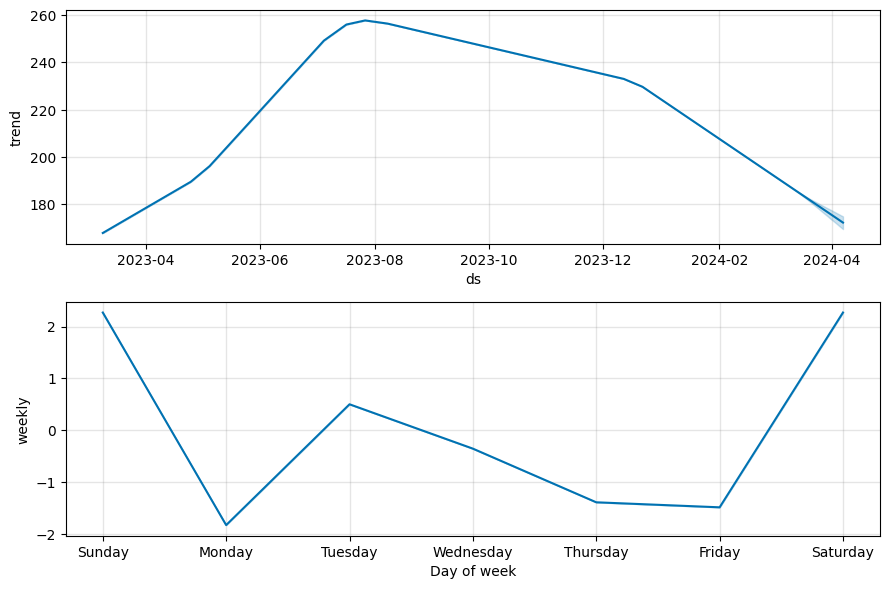

In [ ]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>